# Loading Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
import statsmodels.api as sm

# Loading Data

In [4]:
BTC_data_hours = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_hours.csv', parse_dates=True, index_col = 0)
BTC_data_days = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_days.csv', parse_dates=True, index_col = 0)
BTC_data_weeks = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_weeks.csv', parse_dates=True, index_col = 0)
BTC_data_months = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_months.csv', parse_dates=True, index_col = 0)

#Decomposition Plots

In [5]:
def decompose_time_series(series, multiplicative=False):
    fig = plt.figure(figsize=(18, 8)) # sets the mother figure size
    
    Tn = 1 + (len(series)-1)*3 # Tn = a+(n-1)d, generates a sequence
    first_row_numbers = list(range(1, Tn+1, 3)) # creates a list of the first index of the each row of the subplot
    
    for series_name, ind in zip(series.keys(), first_row_numbers):
        if multiplicative:
            decomposed_series = sm.tsa.seasonal_decompose(series[series_name], model='multiplicative')
        else:
            decomposed_series = sm.tsa.seasonal_decompose(series[series_name], model='additive')
    
        trend = decomposed_series.trend # pulls out the trend series
        seasonality = decomposed_series.seasonal # pulls out the seasonality series
        residuals = decomposed_series.resid # pulls out the residual series
        
        components = [trend, seasonality, residuals] # makes a list of trend, seasonality, and residual series
        
        # creating the subplots
        for i in range(len(components)):
            a = fig.add_subplot(4, 3, ind+i)
            plt.plot(components[i])
            plt.grid()
            
            # these conditional blocks below are to make the subplots' labels and titles to be nicely arranged
            if ind+i < 4:
                plt.title(components[i].name)
            
            if ind+i > 9:
                plt.xlabel('years')
            
            if ind+i in first_row_numbers:
                plt.ylabel(series_name)

In [6]:
print("Size of hourly time series is {}".format(BTC_data_hours.size))
print("Size of daily time series is {}".format(BTC_data_days.size))
print("Size of weekly time series is {}".format(BTC_data_weeks.size))
print("Size of monthly time series is {}".format(BTC_data_months.size))

Size of hourly time series is 76314
Size of daily time series is 3181
Size of weekly time series is 456
Size of monthly time series is 106


In [7]:
series = {'Hourly':BTC_data_hours[BTC_data_hours.size-1000:],
          'Daily':BTC_data_days[BTC_data_days.size-400:],
          'Weekly':BTC_data_weeks,
          'Monthly':BTC_data_months}

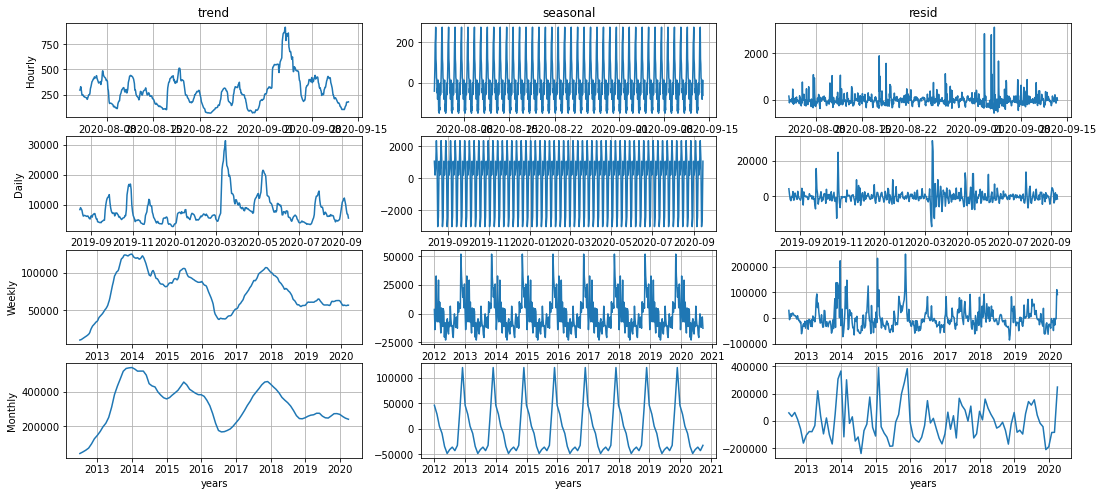

In [8]:
decompose_time_series(series)

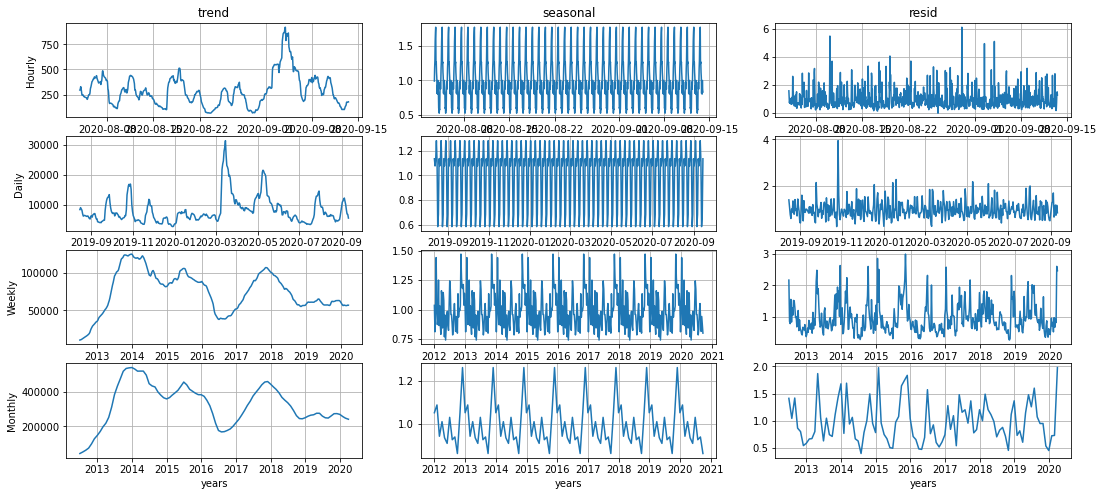

In [9]:
decompose_time_series(series,  multiplicative=True)

There isn't a clear trend in the time series. But there seems to be some seasonality